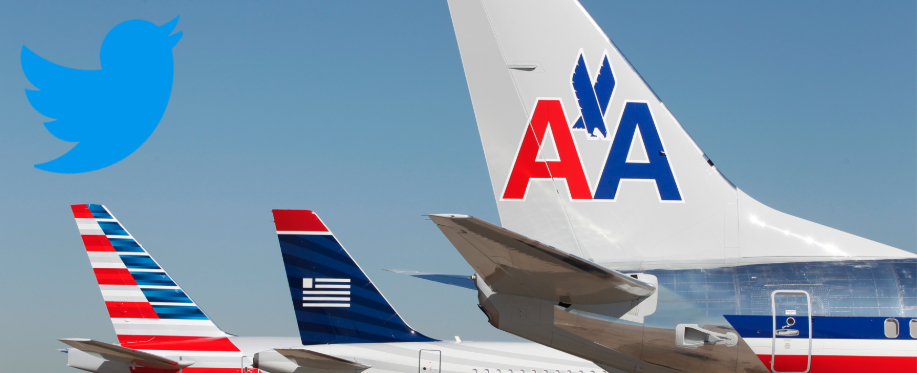

# AIRLINE TWEET ANALYSIS
### - Ronn Kurien

In [1]:
import pandas as pd
import matplotlib as plt
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
air_tweet = pd.read_excel('airline_tweets.xlsx')

In [3]:
air_tweet.describe()

,_unit_id,_trusted_judgments,airline_sentiment:confidence,negativereason:confidence,retweet_count,tweet_id
count,1.464000e+04,14640.000000,14640.000000,10522.000000,14640.000000,1.464000e+04
mean,6.814957e+08,3.618648,0.900169,0.638298,0.082650,5.692605e+17
std,8.504314e+04,11.858704,0.162830,0.330440,0.745778,8.098842e+14
min,6.814482e+08,2.000000,0.335000,0.000000,0.000000,5.680000e+17
25%,6.814536e+08,3.000000,0.692300,0.360600,0.000000,5.690000e+17
50%,6.814578e+08,3.000000,1.000000,0.670600,0.000000,5.690000e+17
75%,6.814623e+08,3.000000,1.000000,1.000000,0.000000,5.700000e+17
max,6.816798e+08,248.000000,1.000000,1.000000,44.000000,5.700000e+17


In [4]:
#View Data
air_tweet.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,570000000000000000,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,570000000000000000,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,570000000000000000,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,570000000000000000,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,570000000000000000,NaN,Pacific Time (US & Canada)


In [5]:
#Number of tweets for each airline
air_tweet.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [6]:
#Calculating number of rows
air_tweet.shape[0]

14640

In [7]:
#Calculating number of columns
air_tweet.shape[1]

20

In [8]:
#Calculating Share of voice - Percentage of tweets for each airline
air_tweet.airline.value_counts()/air_tweet.shape[0]*100

United            26.106557
US Airways        19.897541
American          18.845628
Southwest         16.530055
Delta             15.177596
Virgin America     3.442623
Name: airline, dtype: float64

<AxesSubplot:ylabel='airline'>

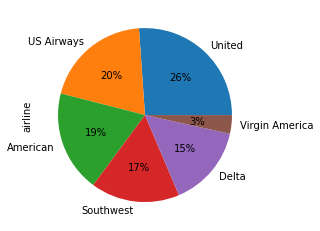

In [9]:
#Share of voice in a pie chart
air_tweet.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [10]:
#Calculate sentiment
sia = SentimentIntensityAnalyzer()

In [11]:
sentiment = [None]*air_tweet.shape[0]
for index, data in air_tweet.iterrows():
    sentiment[index] = sia.polarity_scores(data['text'])['compound']
air_tweet.insert(air_tweet.shape[1],'Sentiment',sentiment)

In [12]:
#View data with sentiment
air_tweet.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,...,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone,Sentiment
0,681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,...,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,570000000000000000,NaN,Eastern Time (US & Canada),0.0000
1,681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,...,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,570000000000000000,NaN,Pacific Time (US & Canada),0.0000
2,681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,...,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,570000000000000000,Lets Play,Central Time (US & Canada),0.0000
3,681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,...,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,570000000000000000,NaN,Pacific Time (US & Canada),-0.5984
4,681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,...,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,570000000000000000,NaN,Pacific Time (US & Canada),-0.5829


In [13]:
#Calculate the avg sentiment by airline
air_tweet.groupby('airline')['Sentiment'].mean()

airline
American          0.013803
Delta             0.126480
Southwest         0.136370
US Airways       -0.022516
United            0.030995
Virgin America    0.143604
Name: Sentiment, dtype: float64

<AxesSubplot:xlabel='airline'>

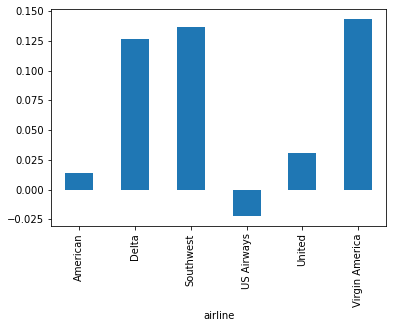

In [14]:
#Plot avg sentiment
air_tweet.groupby('airline')['Sentiment'].mean().plot(kind='bar')